In [1]:
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np

## Add Box Shape Title

> https://stackoverflow.com/questions/40796117/how-do-i-make-the-width-of-the-title-box-span-the-entire-plot/40923440

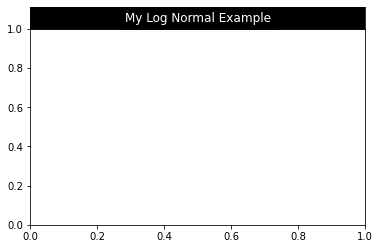

In [2]:
from matplotlib.offsetbox import AnchoredText
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(1, 1)

divider = make_axes_locatable(ax)
cax = divider.append_axes("top", size="11%", pad=0)
cax.get_xaxis().set_visible(False)
cax.get_yaxis().set_visible(False)
cax.set_facecolor('black')

at = AnchoredText("My Log Normal Example", loc=10,
                  prop=dict(backgroundcolor='black',
                            size=12, color='white'))
cax.add_artist(at)

plt.show()

## Rounded Corner Barchart

> https://stackoverflow.com/questions/58425392/bar-chart-with-rounded-corners-in-matplotlib

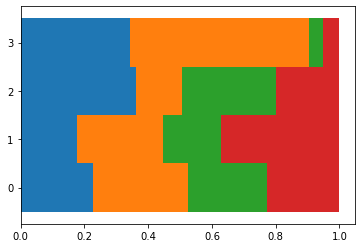

In [3]:
np.random.seed(0)
df = pd.DataFrame(np.random.uniform(0,20, size=(4,4)))
df = df.div(df.sum(1), axis=0)
ax = df.plot.barh(stacked=True, width=1, legend=False)

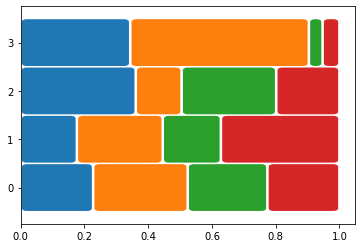

In [4]:
from matplotlib.patches import FancyBboxPatch

ax = df.plot.barh(stacked=True, width=1, legend=False)

new_patches = []
for patch in reversed(ax.patches):
    bb = patch.get_bbox()
    color=patch.get_facecolor()
    p_bbox = FancyBboxPatch((bb.xmin, bb.ymin),
                        abs(bb.width), abs(bb.height),
                        boxstyle="round,pad=-0.0040,rounding_size=0.015",
                        ec="none", fc=color,
                        mutation_aspect=4
                        )
    patch.remove()
    new_patches.append(p_bbox)

for patch in new_patches:
    ax.add_patch(patch)

## Matplotlib Boxplot Color

> https://stackoverflow.com/questions/41997493/python-matplotlib-boxplot-color

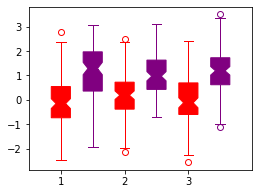

In [5]:
data = np.random.normal(0.1, size=(100,6))
data[76:79,:] = np.ones((3,6))+0.2

plt.figure(figsize=(4,3))
# option 1, specify props dictionaries
c = "red"
plt.boxplot(data[:,:3], positions=[1,2,3], notch=True, patch_artist=True,
            boxprops=dict(facecolor=c, color=c),
            capprops=dict(color=c),
            whiskerprops=dict(color=c),
            flierprops=dict(color=c, markeredgecolor=c),
            medianprops=dict(color=c),
            )


# option 2, set all colors individually
c2 = "purple"
box1 = plt.boxplot(data[:,::-2]+1, positions=[1.5,2.5,3.5], notch=True, patch_artist=True)
for item in ['boxes', 'whiskers', 'fliers', 'medians', 'caps']:
        plt.setp(box1[item], color=c2)
plt.setp(box1["boxes"], facecolor=c2)
plt.setp(box1["fliers"], markeredgecolor=c2)


plt.xlim(0.5,4)
plt.xticks([1,2,3], [1,2,3])
plt.show()

## How to put the legend out of the plot

> https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot

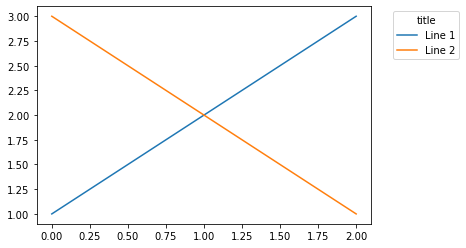

In [6]:
p1, = plt.plot([1, 2, 3], label='Line 1')
p2, = plt.plot([3, 2, 1], label='Line 2')
plt.legend(handles=[p1, p2], title='title', bbox_to_anchor=(1.05, 1), loc='upper left')

## Cyberpunk Style with Matplotlib

> https://towardsdatascience.com/cyberpunk-style-with-matplotlib-f47404c9d4c5

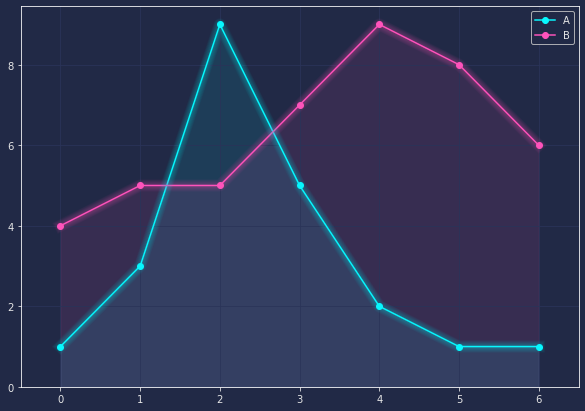

In [7]:
with plt.style.context('dark_background'):

    for param in ['text.color', 'axes.labelcolor', 'xtick.color', 'ytick.color']:
        plt.rcParams[param] = '0.9'  # very light grey
    for param in ['figure.facecolor', 'axes.facecolor', 'savefig.facecolor']:
        plt.rcParams[param] = '#212946'  # bluish dark grey
    colors = [
        '#08F7FE',  # teal/cyan
        '#FE53BB',  # pink
        '#F5D300',  # yellow
        '#00ff41',  # matrix green
    ]
    df = pd.DataFrame({'A': [1, 3, 9, 5, 2, 1, 1],
                       'B': [4, 5, 5, 7, 9, 8, 6]})
    fig, ax = plt.subplots(figsize=(10, 7))
    df.plot(marker='o', color=colors, ax=ax)
    # Redraw the data with low alpha and slighty increased linewidth:
    n_shades = 10
    diff_linewidth = 1.05
    alpha_value = 0.3 / n_shades
    for n in range(1, n_shades+1):
        df.plot(marker='o',
                linewidth=2+(diff_linewidth*n),
                alpha=alpha_value,
                legend=False,
                ax=ax,
                color=colors)
    # Color the areas below the lines:
    for column, color in zip(df, colors):
        ax.fill_between(x=df.index,
                        y1=df[column].values,
                        y2=[0] * len(df),
                        color=color,
                        alpha=0.1)
    ax.grid(color='#2A3459')
    ax.set_xlim([ax.get_xlim()[0] - 0.2, ax.get_xlim()[1] + 0.2])  # to not have the markers cut off
    ax.set_ylim(0)
    plt.show()

## How to Plot Only One Colorbar for Multiple Plot Using Matplotlib

> https://jdhao.github.io/2017/06/11/mpl_multiplot_one_colorbar/

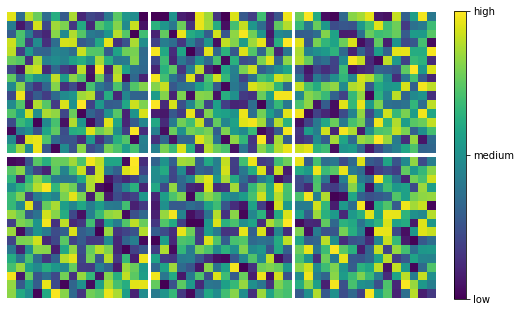

In [8]:
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(8.5, 5))

for ax in axes.flat:
    ax.set_axis_off()
    im = ax.imshow(np.random.random((16, 16)), cmap='viridis',
                   vmin=0, vmax=1)

fig.subplots_adjust(bottom=0.1, top=0.9, left=0.1, right=0.8,
                    wspace=0.02, hspace=0.02)

# add an axes, lower left corner in [0.83, 0.1] measured in figure coordinate with axes width 0.02 and height 0.8

cb_ax = fig.add_axes([0.83, 0.1, 0.02, 0.8])
cbar = fig.colorbar(im, cax=cb_ax)

cbar.set_ticks(np.arange(0, 1.1, 0.5))
cbar.set_ticklabels(['low', 'medium', 'high'])

plt.show()

## Circular / polar histogram in python

> https://stackoverflow.com/questions/22562364/circular-polar-histogram-in-python

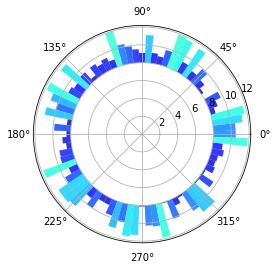

In [9]:
import numpy as np
import matplotlib.pyplot as plt

N = 80
bottom = 8
max_height = 4

theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)
radii = max_height*np.random.rand(N)
width = (2*np.pi) / N

ax = plt.subplot(111, polar=True)
bars = ax.bar(theta, radii, width=width, bottom=bottom)

# Use custom colors and opacity
for r, bar in zip(radii, bars):
    bar.set_facecolor(plt.cm.jet(r / 10.))
    bar.set_alpha(0.8)

plt.show()


## Better visualization of Pie charts by MatPlotLib - Donut Chart

> https://medium.com/@kvnamipara/a-better-visualisation-of-pie-charts-by-matplotlib-935b7667d77f

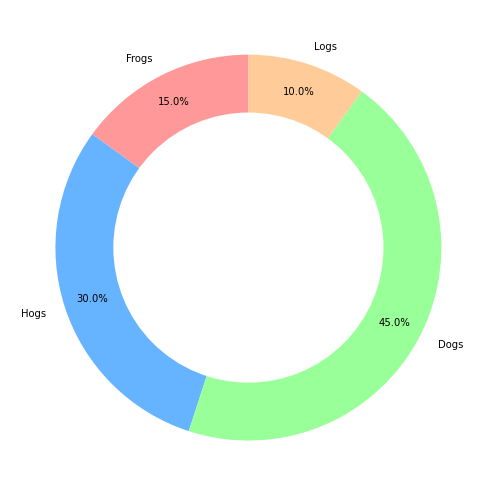

In [10]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(7, 7))

labels = ['Frogs', 'Hogs', 'Dogs', 'Logs']
sizes = [15, 30, 45, 10]
#colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
 
ax.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85)
centre_circle = plt.Circle((0,0),0.70,fc='white')
ax.add_artist(centre_circle)

fig.tight_layout()
plt.show()
